<a href="https://colab.research.google.com/github/ericchoi97/Data_Science/blob/main/(1.%20Financial)%20Tech%20Options%20Chain%20Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 16.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

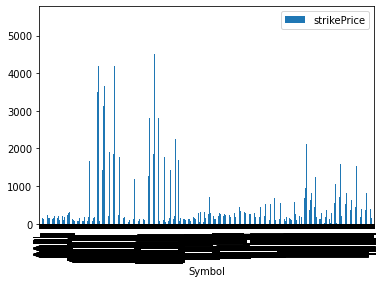

In [5]:
!pip install yfinance
import yfinance as yf
import pandas as pd
from google.colab import data_table

data_table.enable_dataframe_formatter()

yf.pdr_override()

stocklist = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NFLX', 'TSLA']
optionsX = pd.DataFrame()

for x in stocklist:
    tk = yf.Ticker(x)  
    exps = tk.options  #expiration dates
    try:
        for e in exps:
            opt = tk.option_chain(e)
            opt = pd.DataFrame().append(opt.calls).append(opt.puts)
            opt['strikePrice'] = opt['strike']
            opt['Symbol'] = x
            optionsX = optionsX.append(opt, ignore_index=True)
    except:
        pass

# Output the chart
optionsX['strikePrice'] = pd.to_numeric(optionsX['strikePrice']) 
optionsX['Symbol'] = pd.Categorical(optionsX['Symbol']) 

#convert expirationDate to numeric, strikePrice to numeric, and Symbol to Categorical
optionsX.plot(x='Symbol', y='strikePrice', kind="bar")